# WeatherPy by Cenez Tindoc
----

#### Description
*The Python code randomly selects a group of 500+ cities across the world. Then, the code collects data from the OpenWeatherMap API to create a representatitve model of weather across world cities. The API data is used to graph the following relationships:
    * Temperature (F) vs. Latitude
    * Humidity (%) vs. Latitude
    * Cloudiness (%) vs. Latitude
    * Wind Speed (mph) vs. Latitude

*The second part is the linear regression on each relationship of Northern Hemisphere and Southern Hemisphere :
    * Northern Hemisphere - Temperature (F) vs. Latitude   
    * Southern Hemisphere - Temperature (F) vs. Latitude
    * Northern Hemisphere - Humidity (%) vs. Latitude
    * Southern Hemisphere - Humidity (%) vs. Latitude
    * Northern Hemisphere - Cloudiness (%) vs. Latitude
    * Southern Hemisphere - Cloudiness (%) vs. Latitude
    * Northern Hemisphere - Wind Speed (mph) vs. Latitude
    * Southern Hemisphere - Wind Speed (mph) vs. Latitude

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "instructions/output_data/cities_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    city=city.title()
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    country = country.upper()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(f"{city},{country}")

# Print the city count to confirm sufficient count >500
len(cities)


1500

In [22]:
# Create base URL and use Celsius
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# Build partial query URL
query_url=f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=fcf9cfb3bc59833278e3dcc4c2309803&units=imperial&q='

In [24]:
check = (requests.get(query_url + city))
check


<Response [200]>

In [25]:
#Create the bins to store the reqs
city_id=[]
city_name=[]
country=[]
date=[]
temp=[]
cloudiness=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
number=[]
nolist=[]

print('------------------------------')
print('City Data')
print('------------------------------')   

for city in cities:
    try:
        response = (requests.get(query_url + city)).json()
        city_id.append(response['id'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
        temp.append(response["main"]['temp'])
        humidity.append(response["main"]['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response["main"]['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        print(f'{city} is added')
        
    except KeyError:
        
        print(f'{city} is not in the list')


------------------------------
City Data
------------------------------
Busselton,AU is added
Kaeo,NZ is added
Albany,AU is added
Beringovskiy,RU is added
East London,ZA is added
Kapaa,US is added
Ancud,CL is added
Carnarvon,AU is added
Ushuaia,AR is added
Orlik,RU is added
Ushuaia,AR is added
Tuktoyaktuk,CA is added
Grand Gaube,MU is added
Lianran,CN is added
Tiksi,RU is added
Carnarvon,AU is added
Rikitea,PF is added
Toamasina,MG is added
Tyukalinsk,RU is added
Saleaula,WS is not in the list
Hilo,US is added
Bethel,US is added
Sao Filipe,CV is added
Punta Arenas,CL is added
Mataura,PF is not in the list
Albany,AU is added
Port Blair,IN is added
Lebu,CL is added
Narsaq,GL is added
Nadadores,MX is added
Kapaa,US is added
Phu Khieo,TH is not in the list
Bethel,US is added
Faanui,PF is added
Peterhead,GB is added
Sacele,RO is added
Flin Flon,CA is added
Langarud,IR is added
Victoria,SC is added
Ushuaia,AR is added
Rawson,AR is added
Srednekolymsk,RU is added
Los Llanos De Aridane,ES is a

Vaini,TO is added
Nemuro,JP is added
Saleaula,WS is not in the list
Uglovskoye,RU is added
Avera,PF is not in the list
Norman Wells,CA is added
Isangel,VU is added
Dikson,RU is added
Tuktoyaktuk,CA is added
Kirakira,SB is added
Leningradskiy,RU is added
Rikitea,PF is added
Bluff,NZ is added
El Estor,GT is added
Jamestown,SH is added
Namatanai,PG is added
Ponta Do Sol,CV is added
Mataura,PF is not in the list
Cape Town,ZA is added
Provideniya,RU is added
Albany,AU is added
Ponta Delgada,PT is added
Jamestown,SH is added
Lavrentiya,RU is added
Cravo Norte,CO is added
Rikitea,PF is added
Chicama,PE is added
Barrow,US is added
Mayor Pablo Lagerenza,PY is added
Tocopilla,CL is added
Avarua,CK is added
Illoqqortoormiut,GL is not in the list
Jamestown,SH is added
Hermanus,ZA is added
Zvishavane,ZW is added
Taolanaro,MG is not in the list
Kawalu,ID is added
Paita,PE is added
Bogorodskoye,RU is added
New Norfolk,AU is added
Poum,NC is added
Veinticinco De Mayo,AR is added
Busselton,AU is added


Sao Borja,BR is added
Busselton,AU is added
Severo-Kurilsk,RU is added
Puerto Ayora,EC is added
Pacific Grove,US is added
Belen,US is added
Ushuaia,AR is added
Puerto Ayora,EC is added
Fort Nelson,CA is added
Ebeltoft,DK is added
Yellowknife,CA is added
Bluff,NZ is added
Hermanus,ZA is added
Cape Town,ZA is added
Port Elizabeth,ZA is added
Mahebourg,MU is added
Nikolskoye,RU is added
Vila Franca Do Campo,PT is added
Belushya Guba,RU is not in the list
Kodiak,US is added
Pevek,RU is added
Anadyr,RU is added
Kapaa,US is added
Atuona,PF is added
Kedrovyy,RU is added
Busselton,AU is added
The Valley,AI is added
Hovd,MN is added
Rio Gallegos,AR is added
Watertown,US is added
Saskylakh,RU is added
Mataura,PF is not in the list
Bredasdorp,ZA is added
Klyuchi,RU is added
Makakilo City,US is added
San Andres,CO is added
Castro,CL is added
Port Alfred,ZA is added
Yulara,AU is added
Punta Arenas,CL is added
Vila,VU is not in the list
Gravdal,NO is added
Adrar,DZ is added
Rikitea,PF is added
Rocha

Mecca,SA is added
Cape Town,ZA is added
Dakar,SN is added
Tuktoyaktuk,CA is added
Kapaa,US is added
Iqaluit,CA is added
Ahmadpur East,PK is added
Mataura,PF is not in the list
Rivadavia,AR is added
Kruisfontein,ZA is added
Busselton,AU is added
Ushuaia,AR is added
Bredasdorp,ZA is added
Saskylakh,RU is added
Upernavik,GL is added
Rong Kwang,TH is added
Upernavik,GL is added
Port Blair,IN is added
Miracema Do Tocantins,BR is added
Hermanus,ZA is added
Butaritari,KI is added
Hermanus,ZA is added
Punta Arenas,CL is added
Sitka,US is added
Hobart,AU is added
Puerto Ayora,EC is added
Saskylakh,RU is added
Albany,AU is added
Busselton,AU is added
Mwinilunga,ZM is added
Chuy,UY is added
Darhan,MN is added
Svetlaya,RU is added
Vaini,TO is added
Lanxi,CN is added
Wageningen,SR is added
Zyryanka,RU is added
Tiksi,RU is added
Ushuaia,AR is added
Slave Lake,CA is added
Nikolskoye,RU is added
Mae Hong Son,TH is added
Saskylakh,RU is added
Yeniseysk,RU is added
Jamestown,SH is added
Nakama,JP is add

Cape Town,ZA is added
Jamestown,SH is added
Punta Arenas,CL is added
Isangel,VU is added
Tiksi,RU is added
Hermanus,ZA is added
Airai,PW is not in the list
Severo-Kurilsk,RU is added
Taolanaro,MG is not in the list
Vila Velha,BR is added
Mount Gambier,AU is added
Hermanus,ZA is added
Gizo,SB is added
Tasiilaq,GL is added
Port Alfred,ZA is added
Port Alfred,ZA is added
Jamestown,SH is added
Kahului,US is added
Mataura,PF is not in the list
Georgetown,SH is added
Gurgan,AZ is not in the list
Petropavlovsk-Kamchatskiy,RU is added
Waingapu,ID is added
Kindersley,CA is added
Taolanaro,MG is not in the list
Buraydah,SA is added
Santo Domingo,DO is added
Russell,NZ is added
Nigde,TR is added
Aksu,KZ is added
Dikson,RU is added
Marcona,PE is not in the list
Cidreira,BR is added
Alofi,NU is added
Bilma,NE is added
Mataura,PF is not in the list
Arraial Do Cabo,BR is added


In [30]:
# Create the data frame
cities_df = pd.DataFrame({"City ID": city_id,"City": city_name,"Country":country,"Update Date": date,"Temperature": temp,"Cloudiness %": cloudiness,"Humidity": humidity,"Latitude": lat,"Longitude": lng,"Max Temp": max_temp,"Wind Speed": wind_speed})
cities_df["Update Date"]=pd.to_datetime(cities_df["Update Date"], unit='s')
#Saving data to csv
cities_df.to_csv("../output_data/cities_df.csv")
cities_df.head()

,City ID,City,Country,Update Date,Temperature,Cloudiness %,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,2075265,Busselton,AU,2020-01-26 04:57:39,93.11,99,18,-33.65,115.33,93.99,17.54
1,2189343,Kaeo,NZ,2020-01-26 04:57:39,78.57,4,67,-35.10,173.78,82.99,1.01
2,2077963,Albany,AU,2020-01-26 04:57:39,78.80,5,50,-35.02,117.89,78.80,5.82
3,2126710,Beringovskiy,RU,2020-01-26 04:57:39,15.48,100,85,63.05,179.32,15.48,8.14
4,1006984,East London,ZA,2020-01-26 04:57:39,69.80,20,83,-33.02,27.91,69.80,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

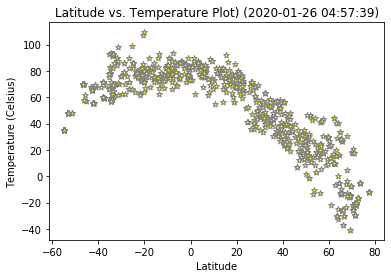

In [31]:
# Generate a scatter plot of Latitude vs. Temperature 
lat = cities_df.iloc[:,7]
temp = cities_df.iloc[:,4]
plt.scatter(lat,temp, marker="*", facecolors="yellow", edgecolors="gray",alpha=1)
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celsius)')
date = cities_df.iloc[0,3]
plt.title(f'Latitude vs. Temperature Plot) ({date})')


plt.savefig("../output_data/latVStemp_plt.png")


#### Analysis
The code is intended to produce a scatter plot of temperatures against its specific latitudes.  I intended to use the latitude in the x axis as a reference since I would like to see the temperatures in reference to the equator.  I used the star marker with yellow color and gray line on the edge.

This plot confirmed that most of the cities near the equator have the higher temperatures if not highest.  There are some cities though in the southern hemisphere that have higher temperature than those near the equator.  Those in the northern hemisphere as expectedly, have lower temperatures.

Temperature seems to have a clear correlation with latitude.

### Latitude vs. Humidity Plot

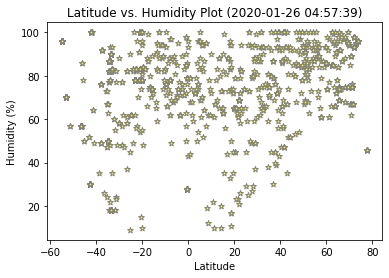

In [33]:
# Generate a scatter plot of Latitude vs. Humidity 
lat = cities_df.iloc[:,7]
humid = cities_df.iloc[:,6]
plt.scatter(lat,humid, marker="*", facecolors="yellow", edgecolors="gray",alpha=1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
date = cities_df.iloc[0,3]
plt.title(f'Latitude vs. Humidity Plot ({date})')

plt.savefig("../output_data/latVShumid_plt.png")


#### Analysis
The code is intended to produce a scatter plot of humidity measurements against its specific latitudes.  Similar to the above, I made the same logical formats and reasonings.

This plot showed that regardless of the location, the latitude has no effect to the humidity of most cities.  There is no strong relationship between latitude and humidity. 

Humidity ranges around 50% and above in most cities.

### Latitude vs. Cloudiness Plot

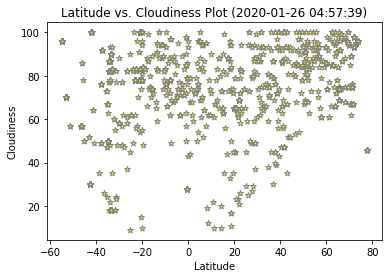

In [34]:
# Generate a scatter plot of Latitude vs. Cloudiness 
lat = cities_df.iloc[:,7]
cloud = cities_df.iloc[:,5]
plt.scatter(lat,humid, marker="*", facecolors="yellow", edgecolors="gray",alpha=1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
date = cities_df.iloc[0,3]
plt.title(f'Latitude vs. Cloudiness Plot ({date})')

plt.savefig("../output_data/latVScloud_plt.png")

#### Analysis
The code is intended to produce a scatter plot of cloudiness against its specific latitudes.  Similar to the above, I made the same logical formats and reasonings.

This plot showed that regardless of the location, the latitude has no effect to the cloudiness of most cities.  There is no strong relationship between latitude and cloudiness. 

Cloudiness ranges around 60% and above in most cities.

### Latitude vs. Wind Speed Plot

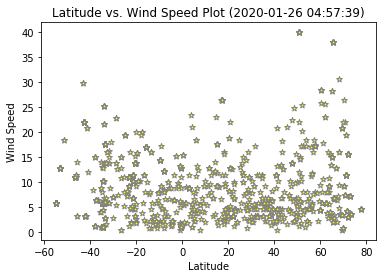

In [35]:
# Generate a scatter plot of Latitude vs. Wind Speed 
lat = cities_df.iloc[:,7]
wind = cities_df.iloc[:,10]
plt.scatter(lat,wind, marker="*", facecolors="yellow", edgecolors="gray",alpha=1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
date = cities_df.iloc[0,3]
plt.title(f'Latitude vs. Wind Speed Plot ({date})')

plt.savefig("../output_data/latVSwind_plt.png")


#### Analysis
The code is intended to produce a scatter plot of wind speeds against its specific latitudes.  Similar to the above, I made the same logical formats and reasonings.

This plot showed that regardless of the location, the latitude has no effect to the wind speed of most cities.  There is no strong relationship between latitude and wind speed. 

Wind speed is low globally not exceeding 15 mph in most cities.

## Linear Regression

####  Northern and Southern Hemisphere DFs

In [ ]:
# Create Northern and Southern Hemisphere DataFrames
# Use City Data as reference
# Collect cities above equator to be listed in North Hemisphere DF
north_df=cities_df.loc[cities_df['Latitude']>0,['City ID','City','Country','Update Date','Temperature','Cloudiness %','Humidity','Latitude','Longitude','Max Temp','Wind Speed']]

#Saving data to csv 
north_df.to_csv("../output_data/north_df.csv", index=False)
north_df

In [ ]:
# Collect cities below equator to be listed in South Hemisphere DF
south_df=cities_df.loc[cities_df['Latitude']<0,['City ID','City','Country','Update Date','Temperature','Cloudiness %','Humidity','Latitude','Longitude','Max Temp','Wind Speed']]

#Saving data to csv 
south_df.to_csv("../output_data/south_df.csv", index=False)
south_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Generate a scatter plot of Latitude vs. Wind Speed 
lat = north_df.iloc[:,7]
max_temp = north_df.iloc[:,9]
plt.scatter(lat,max_temp, marker="*", facecolors="yellow", edgecolors="gray",alpha=1)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celsius)')

# Add the linear regression equation and line to plot
x_values = lat
y_values = max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=14,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.savefig("../output_data/nh_latVSmax_temp.png")


#### Analysis
The northern hemisphere temperatures against its latitudes, produce a true fit  linear regression.  Most of the values are coming to the linear direction.  Therefore, the equation can be used for the prediction for other cities/ locations.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Generate a scatter plot of Latitude vs. Wind Speed 
lat = south_df.iloc[:,7]
max_temp = south_df.iloc[:,9]
plt.scatter(lat,max_temp, marker="*", facecolors="yellow", edgecolors="gray",alpha=1)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celsius)')

# Add the linear regression equation and line to plot
x_values = lat
y_values = max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=14,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.savefig("../output_data/sh_latVSmax_temp.png")

#### Analysis
Similar to the northern hemisphere temperatures, southern hemisphere's  produce a true fit  linear regression.  Most of the values are coming to the linear direction.  Therefore, the equation can be used for the prediction for other cities/ locations.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Generate a scatter plot of Latitude vs. Wind Speed 
lat = north_df.iloc[:,7]
humid = north_df.iloc[:,6]
plt.scatter(lat,humid, marker="*", facecolors="yellow", edgecolors="gray",alpha=1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Add the linear regression equation and line to plot
x_values = lat
y_values = humid
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=14,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.savefig("../output_data/nh_latVShumid.png")


#### Analysis
The northern hemisphere humidity against its latitude produces a slope that were mostly influenced by the cities in the upper part and several outliers in the the lower part of the northern hemisphere.  If these outliers will be taken out, the slope will be diminished.  Therefore, the conclusion of humidity not having a relation to latitude will still stand.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Generate a scatter plot of Latitude vs. Wind Speed 
lat = south_df.iloc[:,7]
max_temp = south_df.iloc[:,9]
plt.scatter(lat,max_temp, marker="*", facecolors="yellow", edgecolors="gray",alpha=1)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celsius)')

# Add the linear regression equation and line to plot
x_values = lat
y_values = max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=14,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.savefig("../output_data/sh_latVSmax_temp.png")


#### Analysis
The southern hemisphere humidity against its latitude produces a true fit linear regression. Most of the values are coming to the linear direction. Therefore, the equation can be used for the prediction for other cities/ locations.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Generate a scatter plot of Latitude vs. Wind Speed 
lat = north_df.iloc[:,7]
cloud = north_df.iloc[:,5]
plt.scatter(lat,cloud, marker="*", facecolors="yellow", edgecolors="gray",alpha=1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Add the linear regression equation and line to plot
x_values = lat
y_values = cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,45),fontsize=14,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.savefig("../output_data/nh_latVScloud.png")

#### Analysis
The northern hemisphere cloudiness against its latitude produces a slope that were mostly influenced by the cities in the upper part and several outliers in the the lower part of the northern hemisphere.  If these outliers will be taken out, the slope will be diminished.  Linear regression is not appropriate for these data.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Generate a scatter plot of Latitude vs. Wind Speed 
lat = south_df.iloc[:,7]
cloud = south_df.iloc[:,5]
plt.scatter(lat,cloud, marker="*", facecolors="yellow", edgecolors="gray",alpha=1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Add the linear regression equation and line to plot
x_values = lat
y_values = cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,50),fontsize=14,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.savefig("../output_data/sh_latVScloud.png")

#### Analysis
The southern hemisphere cloudiness against its latitude depicts a residual plot showing homogeneous erroneous error variances.  Linear regression is not useful to these data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Generate a scatter plot of Latitude vs. Wind Speed 
lat = north_df.iloc[:,7]
wind = north_df.iloc[:,10]
plt.scatter(lat,wind, marker="*", facecolors="yellow", edgecolors="gray",alpha=1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Add the linear regression equation and line to plot
x_values = lat
y_values = wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,50),fontsize=14,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.savefig("../output_data/nh_latVSwind.png")

#### Analysis
The northern hemisphere wind speed against its latitude depicts a residual plot showing error variances increasing with x (latitude).  Linear regression is not useful to these data.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Generate a scatter plot of Latitude vs. Wind Speed 
lat = south_df.iloc[:,7]
wind = south_df.iloc[:,10]
plt.scatter(lat,wind, marker="*", facecolors="yellow", edgecolors="gray",alpha=1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Add the linear regression equation and line to plot
x_values = lat
y_values = wind
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,17),fontsize=14,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

plt.savefig("../output_data/sh_latVSwind.png")

#### Analysis
The southern hemisphere wind speed against its latitude depicts a residual plot showing with no apparent pattern.  Linear regression is not useful to these data.

## Conclusion

#####  Linear regression may not be used in some analyses especially if data has no correlations.
##### Linear regression can provide more information as compared to map plots.
##### With this exercise, it can be confirmed that temperature has a direct relation to latitude but humidity, cloudiness and wind speed have none.